# Split data by subjects

In [17]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load data

In [1]:
import pandas as pd

clustered_data = pd.read_parquet('../../data/combined/clustered/final/Galson_2015a.parquet')

clustered_data.info()
clustered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14738476 entries, 0 to 24
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 3.0+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject,cdr3_len,Cluster_ID
0,2,1,25814,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,127395,"[('70', 'Q'), ('103', 'L')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
1,1,8,29478,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125855,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
2,1,12,31543,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,109459,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
3,1,1,38523,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGLDH,128305,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
4,1,1,50198,SVRVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNTYYVP...,IGHV1-18*03,ARRAPFGFDH,125829,"[('70', 'Q')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1


## Subjects overview

In [6]:
cluster_subj_cnt = clustered_data.groupby('Cluster_ID')['Subject'].nunique()

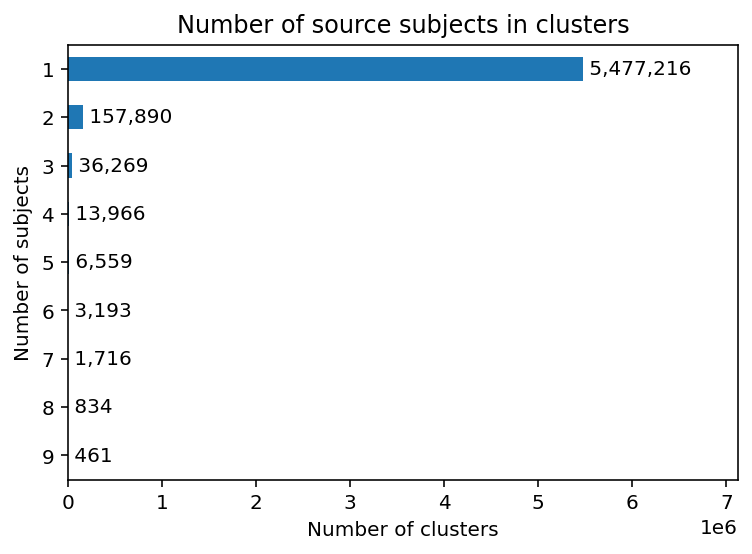

In [18]:
from bin.plotting import barplot

ax=barplot(cluster_subj_cnt.value_counts(), title='Number of source subjects in clusters')
ax.set(ylabel='Number of subjects', xlabel='Number of clusters');

In [19]:
single_subj_clusters = cluster_subj_cnt.index[cluster_subj_cnt == 1]
single_subj_clusters

Int64Index([      0,       1,       3,       4,       5,       6,       7,
                  8,       9,      10,
            ...
            5698094, 5698095, 5698096, 5698097, 5698098, 5698099, 5698100,
            5698101, 5698102, 5698103],
           dtype='int64', name='Cluster_ID', length=5477216)

In [24]:
single_subj_clusters_per_subj = clustered_data[clustered_data['Cluster_ID'].isin(single_subj_clusters)].groupby('Subject')['Cluster_ID'].nunique().sort_values(ascending=False)

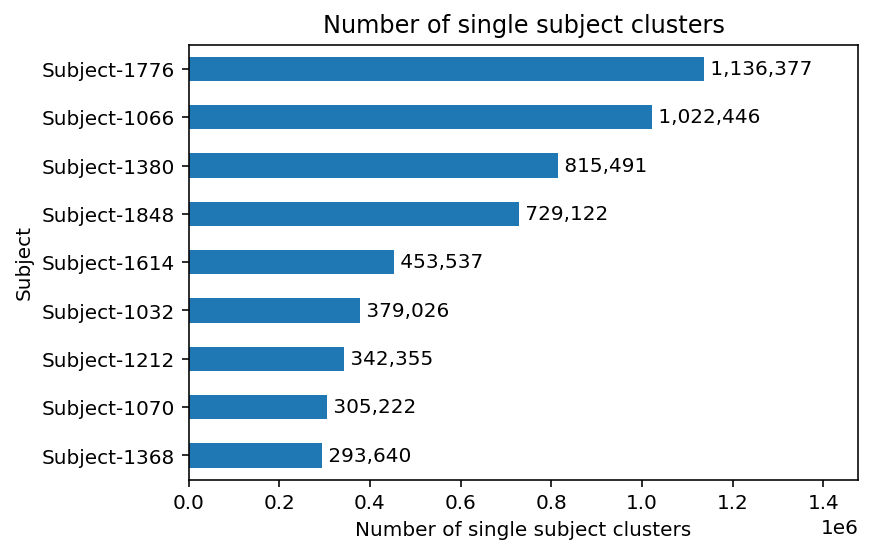

In [25]:
ax=barplot(single_subj_clusters_per_subj, title='Number of single subject clusters')
ax.set(ylabel='Subject', xlabel='Number of single subject clusters');

In [33]:
valid_subjects = ['Subject-1368', 'Subject-1070', 'Subject-1212', 'Subject-1032', 'Subject-1614']
valid_cnt = single_subj_clusters_per_subj[valid_subjects].sum()
total_clusters_cnt = clustered_data['Cluster_ID'].nunique()

print(f'Valid count: {valid_cnt}. Valid ratio: {valid_cnt / total_clusters_cnt}')

Valid count: 1773780. Valid ratio: 0.31129301957282635


In [36]:
valid_clusters = clustered_data[clustered_data['Cluster_ID'].isin(single_subj_clusters) & clustered_data['Subject'].isin(valid_subjects)]['Cluster_ID'].unique()
valid_clusters

array([      1,       9,      10, ..., 5696468, 5696714, 5696980])

In [37]:
valid_clusters.shape

(1773780,)

## Split

In [34]:
mode_seqs = pd.read_parquet('../../data/combined/clustered/final/mode_seq/Galson_2015a_single.parquet')

mode_seqs.info()
mode_seqs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5698104 entries, 0 to 5698103
Data columns (total 26 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   num_errors     object
 1   redundancy     int64 
 2   name           int64 
 3   seq            object
 4   v              object
 5   cdr3           object
 6   original_name  object
 7   errors         object
 8   j              object
 9   data           object
 10  Longitudinal   object
 11  Chain          object
 12  Author         object
 13  Isotype        object
 14  Age            object
 15  Size_igblastn  int64 
 16  Disease        object
 17  Link           object
 18  BSource        object
 19  BType          object
 20  Size           int64 
 21  Species        object
 22  Vaccine        object
 23  Subject        object
 24  cdr3_len       int64 
 25  Cluster_ID     int64 
dtypes: int64(6), object(20)
memory usage: 1.1+ GB


,num_errors,redundancy,name,seq,v,cdr3,original_name,errors,j,data,...,Disease,Link,BSource,BType,Size,Species,Vaccine,Subject,cdr3_len,Cluster_ID
0,1,1,134263,SVKVSCKASGYSFTSKGISWVRQAPGQGLEWMGWISTNSGDTNYAQ...,IGHV1-18*03,ARDVDHRFDH,98191,"[('37', 'K')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,320541,human,HepB,Subject-1776,10,0
1,0,1,88640,SVKVSCKASGYNSATFGLCWVRQAPGEGLEWIGWISGYNGNAYYVP...,IGHV1-18*03,ARRAPFGFDH,128329,[None],IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,257563,human,HepB,Subject-1070,10,1
2,1,1,68354,SVKVSCKASGYPFTINGISWVRQAPGQGLEWMGWISANSGNTIYAY...,IGHV1-18*03,ARDRNYRFDH,67869,"[('69', 'Y')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,210056,human,HepB,Subject-1032,10,2
3,2,1,35076,SVKVSCKASGYTFTRNGISWVRQAPGQGLEWMGWISTNSGNTKYAQ...,IGHV1-18*03,ARDRSHSFVD,114706,"[('101', 'R'), ('123', 'S')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,297611,human,HepB,Subject-1848,10,3
4,1,1,9399,SVKVPCKASGYSFTSNGISWVRQAPGQGLEWLGWISINSGNTNYAQ...,IGHV1-18*03,ARDRLHSLDH,137143,"[('22', 'P')]",IGHJ1*01,"{""fwh1"": {""24"": ""K"", ""25"": ""A"", ""26"": ""S"", ""20...",...,None,https://www.sciencedirect.com/science/article/...,PBMC,Unsorted-B-Cells,297611,human,HepB,Subject-1848,10,4


In [40]:
(mode_seqs.index == mode_seqs['Cluster_ID']).all()

True

In [46]:
y_data = pd.read_parquet('../../data/targets_data/clusters/Galson_2015a.parquet')

y_data.info()
y_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698104 entries, 0 to 5698103
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   HepB    bool 
dtypes: bool(1)
memory usage: 48.9 MB


,HepB
Cluster_ID,
0,False
1,False
2,False
3,False
4,False


In [66]:
X_valid = mode_seqs.loc[valid_clusters]
y_valid = y_data.loc[valid_clusters]

In [67]:
X_valid.to_parquet('../../data/features_data/raw_subject_split/X_valid.parquet')
y_valid.to_parquet('../../data/features_data/raw_subject_split/y_valid.parquet')

In [55]:
X_train = mode_seqs.drop(valid_clusters)
y_train = y_data.drop(valid_clusters)

In [56]:
X_train.to_parquet('../../data/features_data/raw_subject_split/X_train.parquet')
y_train.to_parquet('../../data/features_data/raw_subject_split/y_train.parquet')

## Negative subsampling

In [51]:
from sklearn.utils import shuffle

def features_and_targets(X_dfs, y):
    '''
    Constructs single feature frame and corresponding targets.
    '''
    
    X_subs = shuffle(pd.concat(X_dfs), random_state=RANDOM_STATE)
    y_sub = y.loc[X_subs.index]
    
    return X_subs, y_sub

def save_subsampled_data(X_train, y_train, cluster_sizes, pos_fraction, X_train_data, X_valid_data, y_train_data, y_valid_data, X_valid=None,y_valid=None):
    y_val_coutns = y_train.value_counts()

    if pos_fraction < 1:
        print('Subsampling positive data...')
        X_pos = X_train.sample(int(y_val_coutns[True] * pos_fraction), weights=cluster_sizes.loc[y_train.index[y_train]], random_state=RANDOM_STATE)
    else:
        X_pos = X_train.loc[y_train]
    
    # Subsample negatives to match positive count
    print('Subsampling negative data...')
    X_neg = X_train.sample(len(X_pos), weights=cluster_sizes.loc[y_train.index[y_train == False]], random_state=RANDOM_STATE)

    print(f'Positive training data shape: {X_pos.shape}')
    print(f'Negative training data shape: {X_neg.shape}')

    X_train, y_train = features_and_targets([X_pos, X_neg], y_train)

    print(f'Trainining data shape: {X_train.shape}, target: {y_train.shape}')
    if X_valid is not None and y_valid is not None:
        print(f'Validation data shape: {X_valid.shape}, target: {y_valid.shape}')

    # Save resulting data
    print('Saving training data...')
    X_train.to_parquet(X_train_data)
    pd.DataFrame(y_train, columns=['HepB']).to_parquet(y_train_data)

    if X_valid is not None and y_valid is not None:
        print('Saving validation data...')
        X_valid.to_parquet(X_valid_data)
        pd.DataFrame(y_valid, columns=['HepB']).to_parquet(y_valid_data)

In [52]:
# Save validation data

raw_dir = '../../data/features_data/raw_subject_split'
dir_path = f'{raw_dir}/neg_subs/'

X_valid_data = f'{raw_dir}/X_valid.parquet'
y_valid_data = f'{raw_dir}/y_valid.parquet'

# Neg subs
pos_fraction = 1
X_train_data = f'{dir_path}X_train.parquet'
y_train_data = f'{dir_path}y_train.parquet'

In [58]:
cluster_sizes = clustered_data.groupby('Cluster_ID').size()

In [60]:
y_train = y_train['HepB']

In [62]:
RANDOM_STATE = 42
save_subsampled_data(X_train, y_train, cluster_sizes, pos_fraction, X_train_data, X_valid_data, y_train_data, y_valid_data)

Subsampling negative data...
Positive training data shape: (49502, 26)
Negative training data shape: (49502, 26)
Trainining data shape: (99004, 26), target: (99004,)
Saving training data...


In [63]:
# Balanced validation data
pos_fraction = 1
X_train_data = f'{raw_dir}/X_valid_balanced.parquet'
X_valid_data = f'{raw_dir}/XX_valid.parquet'
y_train_data = f'{raw_dir}/y_valid_balanced.parquet'
y_valid_data = f'{raw_dir}/yy_valid.parquet'

In [69]:
y_valid = y_valid['HepB']

In [70]:
save_subsampled_data(X_valid, y_valid, cluster_sizes, pos_fraction, X_train_data, X_valid_data, y_train_data, y_valid_data)

Subsampling negative data...
Positive training data shape: (11946, 26)
Negative training data shape: (11946, 26)
Trainining data shape: (23892, 26), target: (23892,)
Saving training data...
